# Ch. 1 Introduction to Clustering
## Unsupervised Learning: Basics
- A group of machine learning algorithms that find patterns in data
- Data for algorithms has not been labeled, classified, or characterized
- meant to find and explain inherent structure in the data
- common methods: clustering, neural networks, and anomaly detection

### What is Clustering?
- grouping items with similar characteristics
- items in the cluster are more similar to eachother than points in other groups
- Example: grouping points in a 2D plane by distance from eachother

### Basics of Cluster Analysis
- Cluster: group of items with similar characteristics
- Clustering Algorithms:
    - Hierarchical Clustering:
    - k-Means Clustering:
    - Others: DBSCAN, Gaussian Methods

In [1]:
import pandas as pd
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

df = pd.DataFrame({'x':x, 'y':y})

### Using Hierarchical Clustering

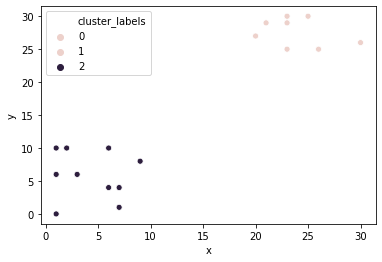

In [2]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(data=df, x='x', y='y', hue='cluster_labels')
plt.show()

### Why do we need to prepare data for clustering?
- variables have incomparable units (dimensions and price)
- variables with same unit can still have different scales and variance
- larger scales and variance influence the clusters more
- need to normalize the features so the have equal scales and variance
- Normalization: process of rescaling the data to a standard deviation of 1 ( x_new = x/std(x))

#### Normalization of Whole Numbers (Generally decreases magnitude)

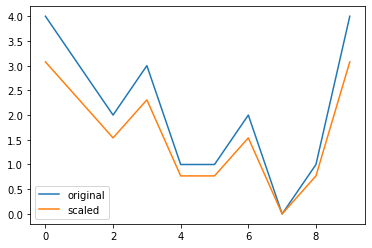

In [6]:
# Import the whiten function to use in normalization
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)

# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

#### Normaliztion of small numbers (Increases magnitude)

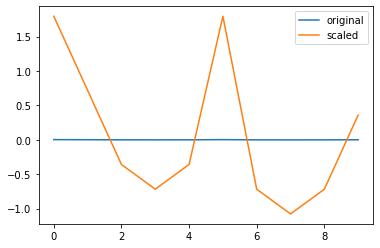

In [7]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

## Scaling Fifa Data

In [8]:
fifa = pd.read_csv('fifa.csv')

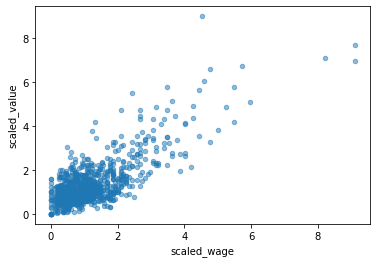

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [11]:
# Import the whiten function to use in normalization
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
import seaborn as sns

# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter', alpha=0.5)
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

# Ch. 2 Hierarchical Clustering with SciPy
### Creating a distance matrix using linkage
- scipy.cluster.hierarchy.linkage(observations, method=, metric=, optimal_ordering=)
    - observations = data
    - method = how to calculate the proximity of the clusters
        - 'single' decides based on two closest objects (more disperse clusters)
        - 'complete' based on two farthest points
        - 'average' based on arithmetic mean of all objects
        - 'centroid' based on geometric mean of all objects
        - 'median' based on median of all objects
        - 'ward' based on sum of squares (more centrally dense clusters)
    - metric = distance metric 
    - optimal ordering = optional argument to order data points
    
### Create cluster labels with fcluster
- scipy.cluster.hierarchy.fcluster(distance_matrix, num_clusters, criterion)
    - distance_matrix = output of linkage() method
    - num_clusters = number of clusters
    - criterion = how to decide thresholds to form clusters

## Visualizing Clusters
### Why?
- try to make sense of the clusters formed
- an additional step in validation of clusters
- spot trends in data

#### Seaborn
- based on matplotlib
- has better, easily modifiable aesthetics than matplotlib
- contains functions that make data visualization tasks easy in the context of data analysis
- Use Case for Clustering: 'hue' parameter allows us to add color for clusters

## How many clusters?
### Introduction to Dendrogram
- dendrograms help in showing progressions as clusters are merged
- a dendrogram is a branching diagram that demonstrates how each cluster is composed by branching out into its child nodes

### Create a dendrogram in SciPy
- from scipy.cluster.hierarchy import dendrogram
- dn = dendrogram(distance_matrix)
- plt.show()

## Hierarchical Clustering on Fifa Dataset

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            2.837810           4.280968
2                            0.579966           1.766698
3                            1.166930           3.415214


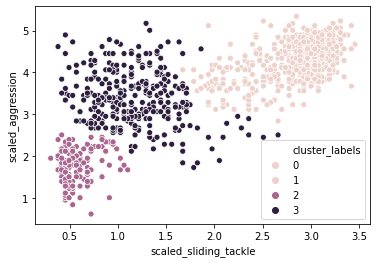

In [15]:
# Imports
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
fifa = pd.read_csv('fifa.csv')

# Scale sliding_tackle and aggression
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

# Ch. 3 k-Means Clustering
## Why k-Means?
- a critical drawback of hierarchical clustering is runtime
- k-Means runs significantly faster on large datasets

## Steps
- Generate Cluster Centers
    - kmeans(obs, k_or_guess, iter, thresh, check_finite)
        - obs: data of standardized observations
        - k_or_guess: number of clusters
        - iter: number of iterations of the algorithm (default is 20)
        - thresh: threshold (default 1e-05
        - check_finite: whether to check if observations contain only finite numbers (default is True)
    - Returns two objects: cluster centers (code_book) and distortion (sum of squared of distance from cluster center to the points in the cluster
- Generate Cluster Labels
    - vq(obs, code_book, check_finite=True)
        - obs: standardized observations
        - code_book: cluster centers from kmeans
        - check_finite: whether to check if observations contain only finite numbers (default is True)
    - Returns two objects: cluster labels  (code_book index) and distortions

## How to find the right value for k?
- no absolute method to find right vallue
- elbow method is common to get as close as possible
- distortion is the sum of squared distances of the points from cluster centers
- decreases with an increasing number of clusters
- becomes zero as the number of clusters approaches the number of samples

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


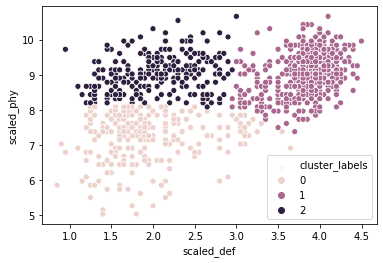

In [20]:
# Imports
import numpy.random as random
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
fifa = pd.read_csv('fifa.csv')

# Scale defense and physical
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

# Ch. 4 Clustering in the Real World
## Clustering movies based on plot descriptions